In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt 

In [158]:
data=pd.read_csv('C:/Users/user/Desktop/НИР/client id (апрель).csv',  dtype={'Дата':str, 'Client ID (Cust. Dim. 2 - S)':str})

# исходные данные
data.head()

,Client ID (Cust. Dim. 2 - S),Категория событий,Дата,Пользователи
0,28457714.1617992843,Product List,20210409,2
1,1000002639.1619770024,flocktory-precheckout,20210430,1
2,1000002639.1619770024,Internal Marketing,20210430,1
3,1000002639.1619770024,Product List,20210430,1
4,1000013384.1617961179,Account,20210409,1


In [159]:
data

,Client ID (Cust. Dim. 2 - S),Категория событий,Дата,Пользователи
0,28457714.1617992843,Product List,20210409,2
1,1000002639.1619770024,flocktory-precheckout,20210430,1
2,1000002639.1619770024,Internal Marketing,20210430,1
3,1000002639.1619770024,Product List,20210430,1
4,1000013384.1617961179,Account,20210409,1
...,...,...,...,...
585394,999991669.1575796457,flocktory-precheckout,20210413,1
585395,999991669.1575796457,Internal Marketing,20210413,1
585396,999991669.1575796457,Product List,20210413,1
585397,undefined.undefined,Product List,20210411,1


In [142]:
# преобразование столбца с датами в формат даты
data["Дата"] = pd.to_datetime(data["Дата"]).dt.strftime('%Y-%m-%d')
data.head()

,Client ID (Cust. Dim. 2 - S),Категория событий,Дата,Пользователи
0,28457714.1617992843,Product List,2021-04-09,2
1,1000002639.1619770024,flocktory-precheckout,2021-04-30,1
2,1000002639.1619770024,Internal Marketing,2021-04-30,1
3,1000002639.1619770024,Product List,2021-04-30,1
4,1000013384.1617961179,Account,2021-04-09,1


In [143]:
# вывод уникальных значений категорий событий
data["Категория событий"].unique()

array(['Product List', 'flocktory-precheckout', 'Internal Marketing',
       'Account', 'Cart', 'Checkout', 'Product', 'Search', 'Video',
       'Store Locator', 'Contact', 'Franchise', 'Social', 'Scroll'],
      dtype=object)

                 category   count
0      Internal Marketing  178672
1   flocktory-precheckout  156968
2            Product List  154400
3                    Cart   36064
4                 Product   25945
5                  Search   13105
6                Checkout   10632
7                 Account    7737
8           Store Locator    1486
9                 Contact     206
10                  Video     154
11              Franchise      28
12                 Social       1
13                 Scroll       1


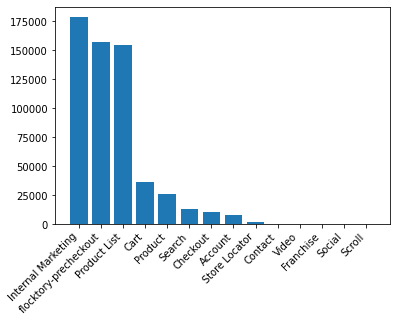

In [144]:
# количество уникальных совпадений в data["Категория событий"]
data["Категория событий"].value_counts()

data_category=pd.DataFrame(data["Категория событий"].value_counts().reset_index().values,  columns=["category", "count"])
print(data_category)
plt.bar(data_category["category"], data_category["count"])
plt.xticks(rotation=45, ha='right')
plt.show()

# можно удалить события Social и Scroll

In [145]:
# количество уникальных совпадений в data["Client ID (Cust. Dim. 2 - S)"]
data["Client ID (Cust. Dim. 2 - S)"].nunique()

184489

In [146]:
# количество уникальных совпадений в data["Client ID (Cust. Dim. 2 - S)"]
# то есть данные пользователи совершали следующее количество событий
data["Client ID (Cust. Dim. 2 - S)"].value_counts()

data_client=pd.DataFrame(data["Client ID (Cust. Dim. 2 - S)"].value_counts().reset_index().values,  columns=["client", "count"])

# можно удалить тех клиентов, у кого количество совершенных событий менее 3, т к они слишком мало совершенный действий (это 81015 Client ID)
print(data_client[data_client["count"]<3])

                       client count
103474   423839312.1617268330     2
103475  1316545139.1599835980     2
103476  1166148352.1587801722     2
103477  1869002628.1618169384     2
103478   151855277.1618514442     2
...                       ...   ...
184484  1462433311.1617703829     1
184485  1765489426.1618758840     1
184486  1380885137.1615205168     1
184487  1093888997.1618595317     1
184488   577027297.1617789520     1

[81015 rows x 2 columns]


In [147]:
data['Дата']=data['Дата'].astype('datetime64[ns]')
day=pd.Grouper(key="Дата", freq="D")

#  распределение пользователей по дням
data_day=data.groupby([day])\
                .sum().reset_index()

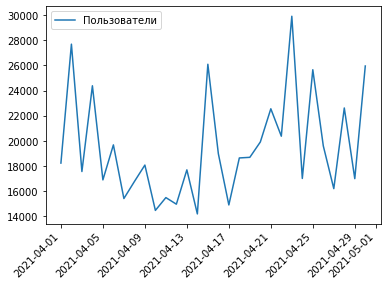

In [149]:
#  распределение пользователей по дням
plt.plot(data_day["Дата"], data_day["Пользователи"], label = 'Пользователи')
plt.xticks(rotation=45, ha='right')
plt.legend( loc=2)
plt.show()

In [150]:
data_day.sort_values(by='Пользователи', ascending = False)

,Дата,Пользователи
22,2021-04-23,29909
1,2021-04-02,27688
14,2021-04-15,26089
29,2021-04-30,25951
24,2021-04-25,25654
3,2021-04-04,24378
27,2021-04-28,22611
20,2021-04-21,22547
21,2021-04-22,20365
19,2021-04-20,19905


In [160]:
# data_day.rolling(12).mean()

In [ ]:
# cols = data.columns[:30] # первые 30 колонок
# # определяем цвета 
# # желтый - пропущенные данные, синий - не пропущенные
# colours = ['#000099', '#ffff00'] 
# sb.heatmap(data[cols].isnull(), cmap=sb.color_palette(colours))

In [122]:
# #  распределение пользователей по категориям
# data_category=data.groupby([day,  'Категория событий'])\
#                 .sum().reset_index()

In [116]:
# sb.barplot(x = "Дата", y = "Пользователи", hue = "Категория событий", data = data_category)
# plt.show()

In [121]:
# sb.swarmplot(x = "Категория событий", y = "Пользователи", data = data_category)
# plt.show()

In [134]:
# pd.DataFrame(data["Client ID (Cust. Dim. 2 - S)"].value_counts().reset_index().values,  columns=["Year", "AggregateCrime"])

In [ ]:
# .size  nunique()